# Data Exploration

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random
import cv2

In [23]:
#path dove si trova il dataframe hmdb51
path = "C:/Users/Ale/Desktop/Uni/Magistrale/Secondo semestre/Deep Learning/Progetto"

##### Per ogni categoria di azioni del dataset viene estratto casualmente un video e catturato un frame

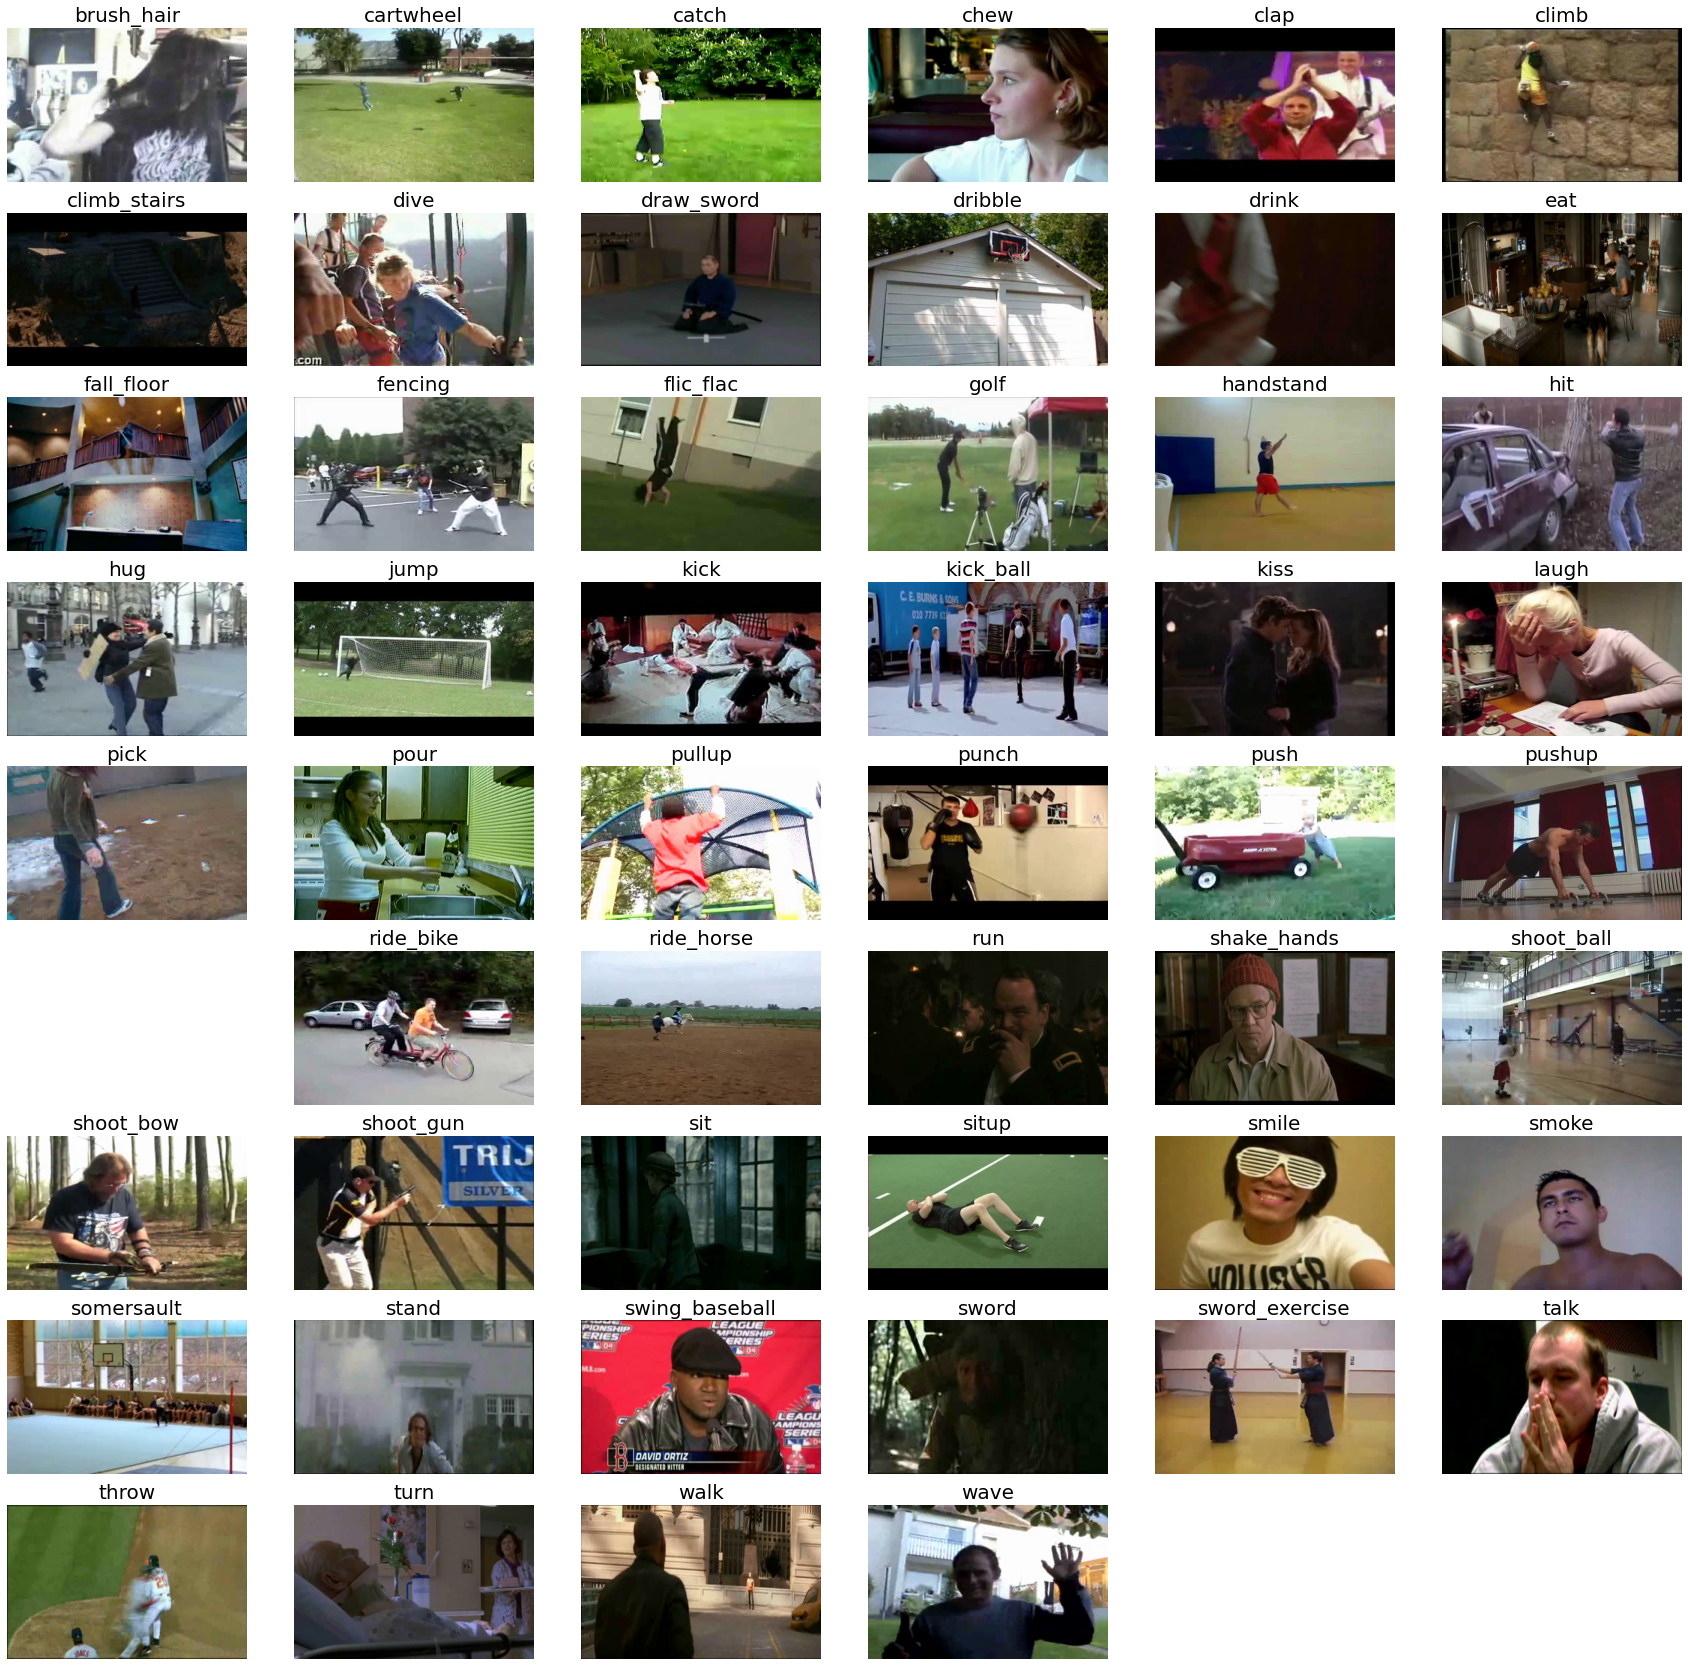

In [3]:
plt.figure(figsize=(30,30))
actions = os.listdir(f"{path}/hmdb51")    #va estratto il dataset dal file zippato
counter = 0
for action in actions:
    counter += 1
    list_videos_action = os.listdir(f"{path}/hmdb51/{action}")    #tutti i video di quell'azione
    if (action != "video") and (action != "rawframes"):  
        selected_video = random.choice(list_videos_action)
        video_reader = cv2.VideoCapture(f"{path}/hmdb51/{action}/{selected_video}")
        ret, gbrframe = video_reader.read()
        video_reader.release()
        rgb_frame = cv2.cvtColor(gbrframe, cv2.COLOR_BGR2RGB)    #converto immagine da BGR a RGB
        plt.subplot(9,6,counter);plt.imshow(rgb_frame, aspect = "auto");plt.axis("off")
        plt.title(action, fontsize = 20)

##### Creo dataframes contenenti le informazioni di quali video usare come training/test

In [6]:
def split_to_df(split):
    df = pd.DataFrame(columns=['action', 'title', 'train/test'])
    for action in actions:
        if (action != "video") and (action != "rawframes"):  
            with open(f"{path}/testTrainMulti_7030_splits/{action}_test_{split}.txt") as f:
                informations = f.readlines()       
            for info in informations:   #per ogni video della lista dei video di una data azione
                df.loc[len(df)] = action, info.split()[0], int(info.split()[1])
    return df

In [7]:
split1 = split_to_df("split1")
split2 = split_to_df("split2")
split3 = split_to_df("split3")

In [ ]:
split1.head(10)

action                                              title train/test
0  brush_hair          April_09_brush_hair_u_nm_np1_ba_goo_0.avi          1
1  brush_hair          April_09_brush_hair_u_nm_np1_ba_goo_1.avi          1
2  brush_hair          April_09_brush_hair_u_nm_np1_ba_goo_2.avi          1
3  brush_hair  Aussie_Brunette_Brushing_Hair_II_brush_hair_u_...          0
4  brush_hair  Aussie_Brunette_Brushing_Hair_II_brush_hair_u_...          1
5  brush_hair  Aussie_Brunette_Brushing_Hair_II_brush_hair_u_...          1
6  brush_hair  Aussie_Brunette_Brushing_Hair_II_brush_hair_u_...          1
7  brush_hair  Aussie_Brunette_Brushing_Hair_II_brush_hair_u_...          1
8  brush_hair  Aussie_Brunette_Brushing_Long_Hair_brush_hair_...          2
9  brush_hair  Aussie_Brunette_Brushing_Long_Hair_brush_hair_...          2

In [9]:
split1.to_csv("split1.csv")
split2.to_csv("split2.csv")
split3.to_csv("split3.csv")

##### Dimensioni video


In [ ]:
dimensions = dict()
for action in actions:
    print("sono ad azione: ", action, end="\r")
    for video in os.listdir(f"{path}/hmdb51/{action}"): 
        if split1[split1["title"] == video]["train/test"].item() != 0:
            video_reader = cv2.VideoCapture(f'{path}/hmdb51/{action}/{video}')
            larghezza  = video_reader.get(cv2.CAP_PROP_FRAME_WIDTH)   # float `width`
            video_reader.release()
            if larghezza not in dimensions:
                dimensions[larghezza] = 1
            else:
                dimensions[larghezza] += 1

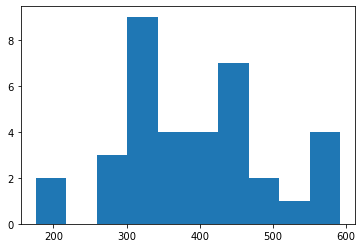

In [ ]:
plt.hist (dimensions)
plt.show()

## Categories exploration

In [ ]:
dataset_directory = '.\dataset\Hmdb51_org_extracted'

In [ ]:
completelist = [os.path.join(path, name) for path, subdirs, files in os.walk(dataset_directory) for name in files]
print("Number of files:", len(completelist))

Number of files: 6766


In [ ]:
cat_list = os.listdir(os.path.join(dataset_directory))
print("Number of categories:", len(cat_list))

Number of categories: 51


In [ ]:
file_name_list = []
cat_list_rep = []

for cat in cat_list:
    path = os.path.join(dataset_directory, cat)
    for loc, subdirs, files in os.walk(path):
        for file in files:
            file_name_list.append(file)
            cat_list_rep.append(cat)

In [ ]:
file_df = pd.DataFrame(list(zip(file_name_list, cat_list_rep)), columns = ['file_name','activity'])
file_df

file_name    activity
0             April_09_brush_hair_u_nm_np1_ba_goo_0.avi  brush_hair
1             April_09_brush_hair_u_nm_np1_ba_goo_1.avi  brush_hair
2             April_09_brush_hair_u_nm_np1_ba_goo_2.avi  brush_hair
3     atempting_to_brush_my_hair_brush_hair_u_nm_np2...  brush_hair
4     atempting_to_brush_my_hair_brush_hair_u_nm_np2...  brush_hair
...                                                 ...         ...
6761                  winKen_wave_u_cm_np1_ba_bad_0.avi        wave
6762                  winKen_wave_u_cm_np1_ri_bad_1.avi        wave
6763  _I_ll_Just_Wave_My_Hand__sung_by_Cornerstone_M...        wave
6764  _I_ll_Just_Wave_My_Hand__sung_by_Cornerstone_M...        wave
6765  _I_ll_Just_Wave_My_Hand__sung_by_Cornerstone_M...        wave

[6766 rows x 2 columns]

In [ ]:
def title_properties(string, category):
    match = re.findall(f'(\S+){category}(\S+)', string)[-1]
    return(match)

In [ ]:
file_df['title'] = file_df.apply(lambda file_df: title_properties(file_df['file_name'], file_df['activity'])[0], axis=1)
file_df['properties'] = file_df.apply(lambda file_df: title_properties(file_df['file_name'], file_df['activity'])[1], axis=1)
file_df

file_name    activity  \
0             April_09_brush_hair_u_nm_np1_ba_goo_0.avi  brush_hair   
1             April_09_brush_hair_u_nm_np1_ba_goo_1.avi  brush_hair   
2             April_09_brush_hair_u_nm_np1_ba_goo_2.avi  brush_hair   
3     atempting_to_brush_my_hair_brush_hair_u_nm_np2...  brush_hair   
4     atempting_to_brush_my_hair_brush_hair_u_nm_np2...  brush_hair   
...                                                 ...         ...   
6761                  winKen_wave_u_cm_np1_ba_bad_0.avi        wave   
6762                  winKen_wave_u_cm_np1_ri_bad_1.avi        wave   
6763  _I_ll_Just_Wave_My_Hand__sung_by_Cornerstone_M...        wave   
6764  _I_ll_Just_Wave_My_Hand__sung_by_Cornerstone_M...        wave   
6765  _I_ll_Just_Wave_My_Hand__sung_by_Cornerstone_M...        wave   

                                                  title  \
0                                             April_09_   
1                                             April_09_   
2                                             April_09_   
3                           atempting_to_brush_my_hair_   
4                           atempting_to_brush_my_hair_   
...                                                 ...   
6761                                            winKen_   
6762                                            winKen_   
6763  _I_ll_Just_Wave_My_Hand__sung_by_Cornerstone_M...   
6764  _I_ll_Just_Wave_My_Hand__sung_by_Cornerstone_M...   
6765  _I_ll_Just_Wave_My_Hand__sung_by_Cornerstone_M...   

                  properties  
0     _u_nm_np1_ba_goo_0.avi  
1     _u_nm_np1_ba_goo_1.avi  
2     _u_nm_np1_ba_goo_2.avi  
3     _u_nm_np2_le_goo_0.avi  
4     _u_nm_np2_le_goo_1.avi  
...                      ...  
6761  _u_cm_np1_ba_bad_0.avi  
6762  _u_cm_np1_ri_bad_1.avi  
6763  _u_cm_np1_fr_med_0.avi  
6764  _u_cm_np1_fr_med_1.avi  
6765  _u_cm_np1_fr_med_2.avi  

[6766 rows x 4 columns]

In [ ]:
def separate_properties(string):
    match = re.match('_(\w+)_(\w+)_(\w+)_(\w+)_(\w+)_(\d+).avi', string)
    return(match)

In [ ]:
file_df['visible_body_parts'] = file_df.apply(lambda file_df: separate_properties(file_df['properties'])[1], axis=1)
file_df['camera_motion'] = file_df.apply(lambda file_df: separate_properties(file_df['properties'])[2], axis=1)
file_df['number_of_people'] = file_df.apply(lambda file_df: separate_properties(file_df['properties'])[3], axis=1)
file_df['camera_viewpoint'] = file_df.apply(lambda file_df: separate_properties(file_df['properties'])[4], axis=1)
file_df['video_quality'] = file_df.apply(lambda file_df: separate_properties(file_df['properties'])[5], axis=1)
file_df['video_number'] = file_df.apply(lambda file_df: separate_properties(file_df['properties'])[6], axis=1)

In [ ]:
file_df_complete = file_df[['title', 'video_number', 'activity', 'visible_body_parts', 'camera_motion', 'number_of_people', 'camera_viewpoint', 'video_quality']]
file_df_complete = file_df_complete.astype({'video_number': int})
file_df_complete

title  video_number  \
0                                             April_09_             0   
1                                             April_09_             1   
2                                             April_09_             2   
3                           atempting_to_brush_my_hair_             0   
4                           atempting_to_brush_my_hair_             1   
...                                                 ...           ...   
6761                                            winKen_             0   
6762                                            winKen_             1   
6763  _I_ll_Just_Wave_My_Hand__sung_by_Cornerstone_M...             0   
6764  _I_ll_Just_Wave_My_Hand__sung_by_Cornerstone_M...             1   
6765  _I_ll_Just_Wave_My_Hand__sung_by_Cornerstone_M...             2   

        activity visible_body_parts camera_motion number_of_people  \
0     brush_hair                  u            nm              np1   
1     brush_hair                  u            nm              np1   
2     brush_hair                  u            nm              np1   
3     brush_hair                  u            nm              np2   
4     brush_hair                  u            nm              np2   
...          ...                ...           ...              ...   
6761        wave                  u            cm              np1   
6762        wave                  u            cm              np1   
6763        wave                  u            cm              np1   
6764        wave                  u            cm              np1   
6765        wave                  u            cm              np1   

     camera_viewpoint video_quality  
0                  ba           goo  
1                  ba           goo  
2                  ba           goo  
3                  le           goo  
4                  le           goo  
...               ...           ...  
6761               ba           bad  
6762               ri           bad  
6763               fr           med  
6764               fr           med  
6765               fr           med  

[6766 rows x 8 columns]

In [ ]:
print("Number of individual videos:", len(file_df_complete.groupby('title').count()))

Number of individual videos: 1407


In [ ]:
sns.barplot(file_df_complete['camera_motion'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TypeError: Horizontal orientation requires numeric `x` variable.

## Video details exploration

In [ ]:
hmdb51_train = hub.load("hub://activeloop/hmdb51-train")
#hmdb51_test = hub.load("hub://activeloop/hmdb51-test")
hmdb51_train

hub://activeloop/hmdb51-train loaded successfully.
This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/hmdb51-train


Dataset(path='hub://activeloop/hmdb51-train', read_only=True, tensors=['visible_body_parts', 'camera_motion', 'camera_viewpoint', 'number_of_people', 'video_quality', 'labels', 'videos'])

In [ ]:
#!pip install torchvision

In [ ]:
import torch
import torch.nn as nn
from torch.nn import functional as F
from torch.utils.data import random_split, DataLoader
from torch.optim.lr_scheduler import StepLR
import torchvision
from torchvision import get_video_backend
from torchvision.models.video import r3d_18 
from torchvision import transforms

In [ ]:
hmdb51_training = torchvision.datasets.HMDB51('video_data/', 'test_train_splits/', num_frames,
                                                step_between_clips = clip_steps, fold=1, train=True,
                                                transform=data, num_workers=num_workers)
batch_size=32
data_loader = DataLoader(hmdb51_training, batch_size=batch_size, shuffle=True, **kwargs)

TypeError: __init__() missing 3 required positional arguments: 'root', 'annotation_path', and 'frames_per_clip'

### CNN ALE 

#### Per colab

In [2]:
# Link Google Drive account
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [12]:
t0 = time()
# Transfer zip dataset to the current virtual machine
copyfile('gdrive/My Drive/Deep learning/train.zip', 'train.zip')
# Extract files
zip = zipfile.ZipFile('train.zip')
zip.extractall()
zip.close()
print("File transfer completed in %0.3f seconds" % (time() - t0))

File transfer completed in 44.775 seconds


In [6]:
t0 = time()
# Transfer zip dataset to the current virtual machine
copyfile('gdrive/My Drive/Deep learning/test.zip', 'test.zip')
# Extract files
zip = zipfile.ZipFile('test.zip')
zip.extractall()
zip.close()
print("File transfer completed in %0.3f seconds" % (time() - t0))

File transfer completed in 11.668 seconds


#### CNN

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
from matplotlib import pyplot as plt
import zipfile
from shutil import copyfile
from time import time
import numpy as np
import random as python_random
import zipfile
import pickle

#### Augmentation 1 frame

In [99]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2)
])

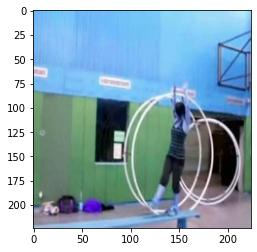

In [77]:
img = cv2.imread("C:/Users/Ale/Desktop/Uni/Magistrale/Secondo semestre/Deep Learning/Progetto/hmdb51/rawframes/train/cartwheel/(Rad)Schlag_die_Bank!_cartwheel_f_cm_np1_le_med_0.avi/(Rad)Schlag_die_Bank!_cartwheel_f_cm_np1_le_med_0.avi_frame_1.jpg")
img = tf.expand_dims(img, 0)
plt.imshow(img[0])

(-0.5, 223.5, 223.5, -0.5)

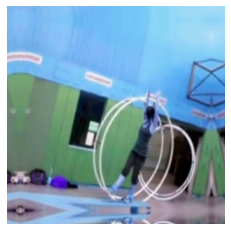

In [108]:
augmented_image = data_augmentation(img)
plt.imshow(augmented_image[0].numpy().astype("uint8"))
plt.axis("off")

### Augmentation + frames ?

In [119]:
image_datagen = ImageDataGenerator(zoom_range = 0.2, 
                                   rotation_range = 45,
                                   horizontal_flip = True)
#image_datagen.fit(train_dataset, augment=True)
train_generator = image_datagen.flow_from_directory(f'{path}/hmdb51/rawframes/train', batch_size = 8)
model.fit_generator(train_generator, steps_per_epoch=1500, epochs=10, validation_data = val_dataset)

Found 71938 images belonging to 51 classes.


<ipython-input-119-281818047b6c>:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator, steps_per_epoch=2000, epochs=50, validation_data = val_dataset)


Epoch 1/50
  16/2000 [..............................] - ETA: 38:33 - loss: 4.5138 - accuracy: 0.0742

KeyboardInterrupt: 

# CNN PAPER 

In [20]:
num_classes = 51

model_spat = keras.models.Sequential()

model_spat.add(keras.layers.Conv2D(96, (7,7), strides = 2, input_shape=(224, 224, 3), activation = "relu"))
model_spat.add(keras.layers.BatchNormalization())
model_spat.add(keras.layers.MaxPooling2D((3,3), strides=2, padding="same"))

model_spat.add(keras.layers.ZeroPadding2D(padding = (1,1)))
model_spat.add(keras.layers.Conv2D(256, (5,5), strides = 2, activation='relu'))
model_spat.add(keras.layers.BatchNormalization())
model_spat.add(keras.layers.MaxPooling2D((3,3), strides=2, padding="same"))
          
model_spat.add(keras.layers.ZeroPadding2D(padding = (1,1)))
model_spat.add(keras.layers.Conv2D(512, (3,3), strides = 1, activation='relu'))

model_spat.add(keras.layers.ZeroPadding2D(padding = (1,1)))
model_spat.add(keras.layers.Conv2D(512, (3,3), strides = 1, activation='relu'))

model_spat.add(keras.layers.ZeroPadding2D(padding = (1,1)))
model_spat.add(keras.layers.Conv2D(512, (3,3), strides = 1, activation='relu'))
model_spat.add(keras.layers.MaxPooling2D((3,3), strides=2, padding="same"))

model_spat.add(keras.layers.Flatten())

model_spat.add(keras.layers.Dense(4096, activation='relu'))
model_spat.add(keras.layers.Dropout(0.5))

model_spat.add(keras.layers.Dense(2048, activation='relu'))
model_spat.add(keras.layers.Dropout(0.5))

model_spat.add(keras.layers.Softmax())

model_spat.add(keras.layers.Dense(num_classes, activation="softmax"))

In [19]:
num_classes = 51

model_mot= keras.models.Sequential()

model_mot.add(keras.layers.Conv2D(96, (7,7), strides = 2, input_shape=(224, 224, 3), activation = "relu"))
model_mot.add(keras.layers.BatchNormalization())
model_mot.add(keras.layers.MaxPooling2D((3,3), strides=2, padding="same"))

model_mot.add(keras.layers.ZeroPadding2D(padding = (1,1)))
model_mot.add(keras.layers.Conv2D(256, (5,5), strides = 2, activation='relu'))
model_mot.add(keras.layers.BatchNormalization())
model_mot.add(keras.layers.MaxPooling2D((3,3), strides=2, padding="same"))
          
model_mot.add(keras.layers.ZeroPadding2D(padding = (1,1)))
model_mot.add(keras.layers.Conv2D(512, (3,3), strides = 1, activation='relu'))

model_mot.add(keras.layers.ZeroPadding2D(padding = (1,1)))
model_mot.add(keras.layers.Conv2D(512, (3,3), strides = 1, activation='relu'))

model_mot.add(keras.layers.ZeroPadding2D(padding = (1,1)))
model_mot.add(keras.layers.Conv2D(512, (3,3), strides = 1, activation='relu'))
model_mot.add(keras.layers.MaxPooling2D((3,3), strides=2, padding="same"))

model_mot.add(keras.layers.Flatten())

model_mot.add(keras.layers.Dense(4096, activation='relu'))
model_mot.add(keras.layers.Dropout(0.5))

model_mot.add(keras.layers.Dense(2048, activation='relu'))
model_mot.add(keras.layers.Dropout(0.5))

model_mot.add(keras.layers.Softmax())

model_mot.add(keras.layers.Dense(num_classes, activation="softmax"))

In [21]:
model_spat.compile(loss=keras.losses.categorical_crossentropy, metrics=['accuracy'], 
              optimizer=keras.optimizers.RMSprop(learning_rate=0.001))

In [27]:
history = model_spat.fit(train_dataset,  epochs=2, 
                    validation_data=val_dataset)

Epoch 1/2
   8/4497 [..............................] - ETA: 7:37:10 - loss: 3.9306 - accuracy: 0.0312

KeyboardInterrupt: 

## TRAIN CNN FATTA A MANO

In [24]:
train_dataset = keras.preprocessing.image_dataset_from_directory(f'{path}/hmdb51/rawframes/train',
                                                            image_size=(224,224),
                                                            color_mode='rgb',
                                                            batch_size=16,
                                                            label_mode='categorical',
                                                            seed=1)

Found 71937 files belonging to 51 classes.


In [26]:
val_dataset = keras.preprocessing.image_dataset_from_directory(f'{path}/hmdb51/rawframes/test',
                                                            image_size=(224,224),
                                                            color_mode='rgb',
                                                            batch_size= 16,
                                                            label_mode='categorical',
                                                            seed=1)

Found 30002 files belonging to 51 classes.


In [111]:
num_classes = 51

model = keras.models.Sequential()

data_augmentation

model.add(keras.layers.Conv2D(32, 3, input_shape=(224, 224, 3), kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.MaxPooling2D(3, strides=3, padding="same"))

model.add(keras.layers.Conv2D(64, 3, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.MaxPooling2D(3, strides=3, padding="same"))

model.add(keras.layers.Conv2D(128, 3, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.MaxPooling2D(3, strides=3, padding="same"))

model.add(keras.layers.Conv2D(256, 3, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))

model.add(keras.layers.GlobalMaxPooling2D())

model.add(keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(keras.layers.Dense(num_classes, activation="softmax", kernel_regularizer=tf.keras.regularizers.l2(0.001)))

In [217]:
model.compile(loss=keras.losses.categorical_crossentropy, metrics=['accuracy'], 
              optimizer=keras.optimizers.RMSprop(learning_rate=0.001))

In [218]:
history = model.fit(train_dataset,  epochs=2, 
                    validation_data=val_dataset)

Epoch 1/2
   1/4497 [..............................] - ETA: 10:14:58 - loss: 19.1210 - accuracy: 0.0000e+00

KeyboardInterrupt: 

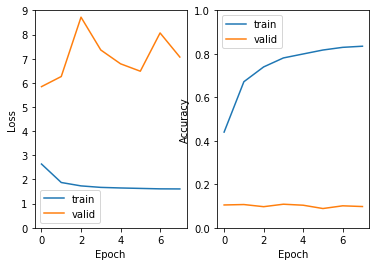

In [76]:
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim([0.0, 9.0])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'valid'])

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylim([0.0, 1.0])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'valid'])

##### Provare il modello con immagini a caso

In [77]:
with open('history foto1.pkl', 'wb') as file_pi:
        pickle.dump(history.history, file_pi)

In [71]:
image = cv2.imread("/content/train/chew/Bubble_gum!_XD_chew_h_cm_np1_fr_bad_2.avi/Bubble_gum!_XD_chew_h_cm_np1_fr_bad_2.avi_frame_41.jpg")
image = image[None, :, :]
#image = image[None , :, :, :]
image.shape

(1, 224, 224, 3)

In [72]:
image = cv2.imread("/content/train/chew/Bubble_gum!_XD_chew_h_cm_np1_fr_bad_2.avi/Bubble_gum!_XD_chew_h_cm_np1_fr_bad_2.avi_frame_41.jpg")
model(image, train = False)

ValueError: ignored

In [ ]:
def evaluate(video_path):
  global model
  results = list()
  frames = list()
  video_reader = cv2.VideoCapture(video_path)
  ret, frame = video_reader.read()
  count_frame = 1
  while ret:
      frames.append(frame)
      for i in range(4):          #leggo un frame ogni 4 
          ret, frame = video_reader.read()
      if not ret:
          break
      #print(f'Action: {action}, video letti: {counter_n_video} su {n_video}', end = "\r")
      count_frame += 4
  for frame in frames:
    model(x, training = False)      

In [ ]:
model(x, training=False)

In [ ]:
# net.save('mymodel.h5')

In [ ]:
#net.evaluate(val_dataset)

In [120]:
model = keras.models.load_model(f'{path}/aumentato.h5')

In [188]:
img = cv2.imread("C:/Users/Ale/Desktop/Uni/Magistrale/Secondo semestre/Deep Learning/Progetto/hmdb51/rawframes/train/draw_sword/Muso_Jikiden_Eishin_ryu_iaido_draw_sword_f_cm_np1_ri_med_3.avi/Muso_Jikiden_Eishin_ryu_iaido_draw_sword_f_cm_np1_ri_med_3.avi_frame_29.jpg")
img = tf.expand_dims(img, 0)

In [189]:
results = model.predict(img)

1/1 [==============================] - 0s 69ms/step


In [190]:
dict_actions = dict()
for n in range(len(actions)):
    dict_actions[n] = actions[n]

In [197]:
dict_actions

{0: 'brush_hair',
 1: 'cartwheel',
 2: 'catch',
 3: 'chew',
 4: 'clap',
 5: 'climb',
 6: 'climb_stairs',
 7: 'dive',
 8: 'draw_sword',
 9: 'dribble',
 10: 'drink',
 11: 'eat',
 12: 'fall_floor',
 13: 'fencing',
 14: 'flic_flac',
 15: 'golf',
 16: 'handstand',
 17: 'hit',
 18: 'hug',
 19: 'jump',
 20: 'kick',
 21: 'kick_ball',
 22: 'kiss',
 23: 'laugh',
 24: 'pick',
 25: 'pour',
 26: 'pullup',
 27: 'punch',
 28: 'push',
 29: 'pushup',
 30: 'rawframes',
 31: 'ride_bike',
 32: 'ride_horse',
 33: 'run',
 34: 'shake_hands',
 35: 'shoot_ball',
 36: 'shoot_bow',
 37: 'shoot_gun',
 38: 'sit',
 39: 'situp',
 40: 'smile',
 41: 'smoke',
 42: 'somersault',
 43: 'stand',
 44: 'swing_baseball',
 45: 'sword',
 46: 'sword_exercise',
 47: 'talk',
 48: 'throw',
 49: 'turn',
 50: 'walk',
 51: 'wave'}

In [199]:
results

array([[0.02056525, 0.06011099, 0.00633918, 0.00533882, 0.01627268,
        0.02593699, 0.00637463, 0.08673402, 0.00677803, 0.00910238,
        0.00620158, 0.00471829, 0.011592  , 0.00985644, 0.0408018 ,
        0.01575488, 0.06316446, 0.01632191, 0.00533727, 0.00518478,
        0.00255154, 0.00917559, 0.00808354, 0.00627351, 0.04317312,
        0.00202885, 0.02212913, 0.0052085 , 0.02760451, 0.00487106,
        0.03804989, 0.03627687, 0.01643958, 0.00175183, 0.04223774,
        0.00250154, 0.02854865, 0.0110696 , 0.01512002, 0.00865591,
        0.01028374, 0.04886169, 0.00546267, 0.00499249, 0.03282847,
        0.01975049, 0.04479065, 0.0434058 , 0.01004667, 0.01997645,
        0.00536352]], dtype=float32)

In [193]:
np.argsort(results, axis=1)[:,-5:]

array([[46, 41,  1, 16,  7]], dtype=int64)

- Per ogni video del test set prendo un tot numero di frames (guardo video più corto e vedo quanti ne ha) equidistanziati 
- Prendiamo i relativi OF 
- Iteriamo, evaluate model performances <br>
\---> Stonks